In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
import os, sys
sys.path.insert(0, '../../mcdose/')
from os.path import join as pjoin

%aimport mcdose
from mcdose import get_trained_model

In [3]:
run="/media/hdd1/g4sim/runs_shenggpu2/0109"
os.environ['CUDA_VISIBLE_DEVICES'] = ""
model = get_trained_model(
    config=pjoin(run, 'config.yml'),
    weights=pjoin(run, 'checkpoints', 'weights.hdf5'),
    normstats=pjoin(run, 'normstats.json'),
)

In [4]:
import numpy as np
data = np.load('/media/hdd1/g4sim/traindata/traindata_2020mar06_2k_14ctx/test/test_003.npy')

In [5]:
print(data.shape)
labels, inputs = data[..., :1], data[...,1:]

(1682, 29, 101, 29, 3)


In [6]:
import tensorflow as tf
x = inputs[:10]
y = model(x)
print(x[0,...,0].max())
print(y[0].numpy().max())



2106.853
1564.4476


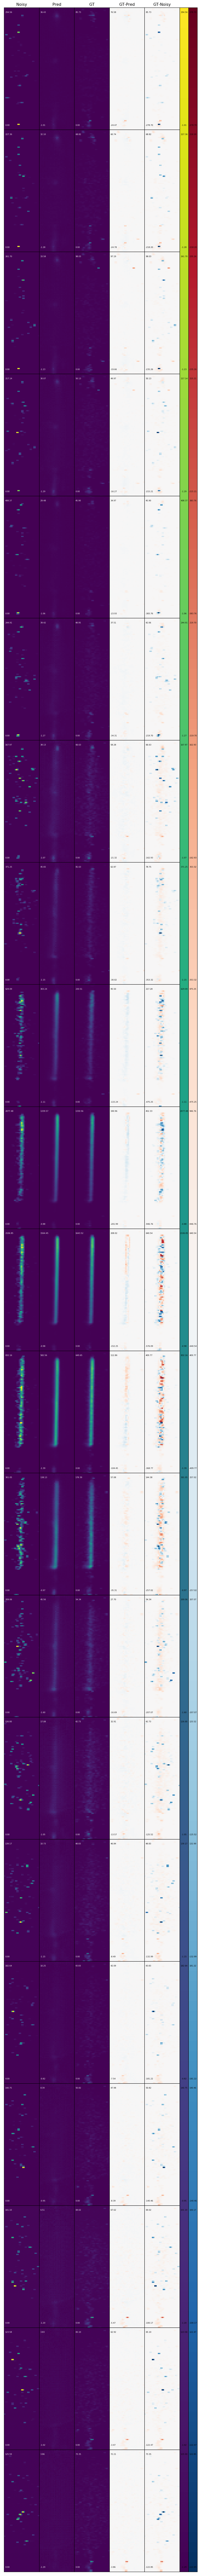

In [7]:
import matplotlib.pyplot as plt
from mcdose.visualize import create_volume_dose_figure
examplenum=0
fig = create_volume_dose_figure(
    np.stack([
        np.stack([
            x[examplenum, slicenum, ..., 0],
            y[examplenum, slicenum, ..., 0],
            labels[:10][examplenum, slicenum, ..., 0],
            labels[:10][examplenum, slicenum, ..., 0]-y[examplenum, slicenum, ..., 0],
            labels[:10][examplenum, slicenum, ..., 0]-x[examplenum, slicenum, ..., 0],
        ],
        axis=0) for slicenum in range(labels.shape[1]//2-10, labels.shape[1]//2+11)],
    axis=0),
    col_labels=['Noisy', 'Pred', 'GT', 'GT-Pred', 'GT-Noisy'],
    ndiff_cols=2,
    return_fig=True
)
plt.show()

SyntaxError: invalid syntax (<ipython-input-8-09c8a0c03c80>, line 1)